In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, precision_recall_curve, roc_curve
from imblearn.over_sampling import SMOTE
import shap
import warnings
warnings.filterwarnings("ignore")

In [22]:
#Load data
df = pd.read_csv("creditcard.csv")
print("Dataset Shape:", df.shape)
df.head()

Dataset Shape: (284807, 31)


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [23]:
df.isnull().sum()

,0
Time,0
V1,0
V2,0
V3,0
V4,0
V5,0
V6,0
V7,0
V8,0
V9,0


In [24]:
df.dropna()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


Class
0    284315
1       492
Name: count, dtype: int64


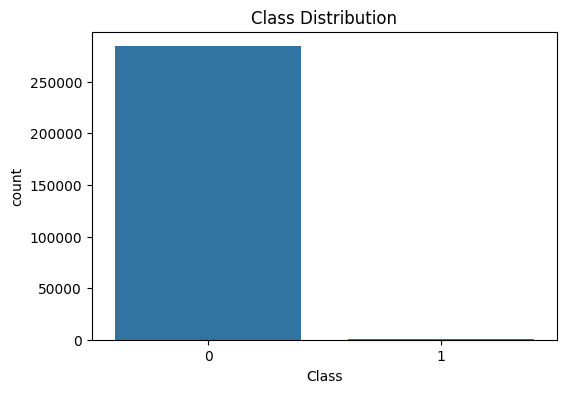

In [25]:
# Exploratory Data Analysis
print(df['Class'].value_counts())
plt.figure(figsize=(6,4))
sns.countplot(x='Class', data=df)
plt.title('Class Distribution')
plt.show()

Data is highly imbalanced

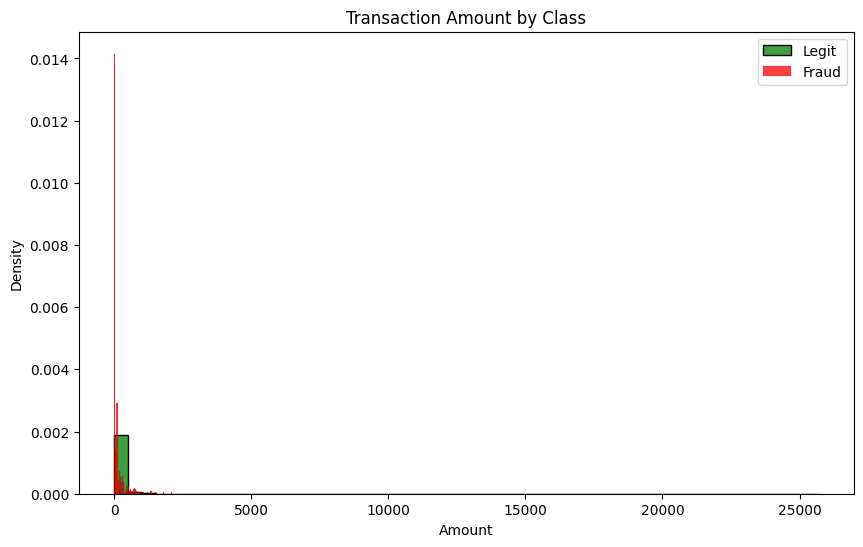

In [26]:
# Plotting amount distribution
plt.figure(figsize=(10,6))
sns.histplot(df[df['Class']==0]['Amount'], bins=50, label='Legit', color='green', stat="density")
sns.histplot(df[df['Class']==1]['Amount'], bins=50, label='Fraud', color='red', stat="density")
plt.legend()
plt.title("Transaction Amount by Class")
plt.show()

Observations:

* Right-skewed distribution:
Both classes are heavily skewed to the right, with the vast majority of transactions being small in amount.

* Fraud transactions spike at very low amounts:
The red bar near zero is very tall, indicating that many fraud transactions involve very small amounts.

* Fraud transactions also have a wider range:
Fraudulent transactions extend to much higher values (up to around 8000), while most legit transactions are concentrated in a lower range.

* Legit transactions cluster tightly:
There's a dense green cluster around small values, tapering off quickly as the amount increases.

This could mean that:

* Fraudsters may frequently attempt low-value transactions to avoid detection.

* Some high-value frauds do exist, though they’re rare.

* Legitimate users mostly transact within a predictable, smaller range.

In [27]:
# Data Preprocessing
# Scaling 'Amount' and 'Time'
scaler = StandardScaler()
df['Amount_scaled'] = scaler.fit_transform(df[['Amount']])
df['Time_scaled'] = scaler.fit_transform(df[['Time']])

df.drop(['Amount', 'Time'], axis=1, inplace=True)

# Define features and target
X = df.drop('Class', axis=1)
y = df['Class']

In [28]:
# Handle Class Imbalance using SMOTE
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

print("Before SMOTE:", np.bincount(y_train))
print("After SMOTE :", np.bincount(y_resampled))

Before SMOTE: [227451    394]
After SMOTE : [227451 227451]


In [29]:
# Model Building

# Logistic Regression
lr = LogisticRegression(max_iter=1000)
lr.fit(X_resampled, y_resampled)
lr_preds = lr.predict(X_test)

# Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_resampled, y_resampled)
rf_preds = rf.predict(X_test)

# XGBoost
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb.fit(X_resampled, y_resampled)
xgb_preds = xgb.predict(X_test)

In [30]:
# Model Evaluation

def evaluate_model(name, y_true, y_pred, y_score):
    print(f"\n--- {name} ---")
    print("Confusion Matrix:\n", confusion_matrix(y_true, y_pred))
    print("\nClassification Report:\n", classification_report(y_true, y_pred))
    print("ROC-AUC Score:", roc_auc_score(y_true, y_score))

evaluate_model("Logistic Regression", y_test, lr_preds, lr.predict_proba(X_test)[:,1])
evaluate_model("Random Forest", y_test, rf_preds, rf.predict_proba(X_test)[:,1])
evaluate_model("XGBoost", y_test, xgb_preds, xgb.predict_proba(X_test)[:,1])


--- Logistic Regression ---
Confusion Matrix:
 [[55406  1458]
 [    8    90]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.97      0.99     56864
           1       0.06      0.92      0.11        98

    accuracy                           0.97     56962
   macro avg       0.53      0.95      0.55     56962
weighted avg       1.00      0.97      0.99     56962

ROC-AUC Score: 0.9698482164390798

--- Random Forest ---
Confusion Matrix:
 [[56846    18]
 [   19    79]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.81      0.81      0.81        98

    accuracy                           1.00     56962
   macro avg       0.91      0.90      0.90     56962
weighted avg       1.00      1.00      1.00     56962

ROC-AUC Score: 0.9688195357630954

--- XGBoost ---
Confusion Matrix:
 [[56832    32]
 [   11    87]]

Classifi

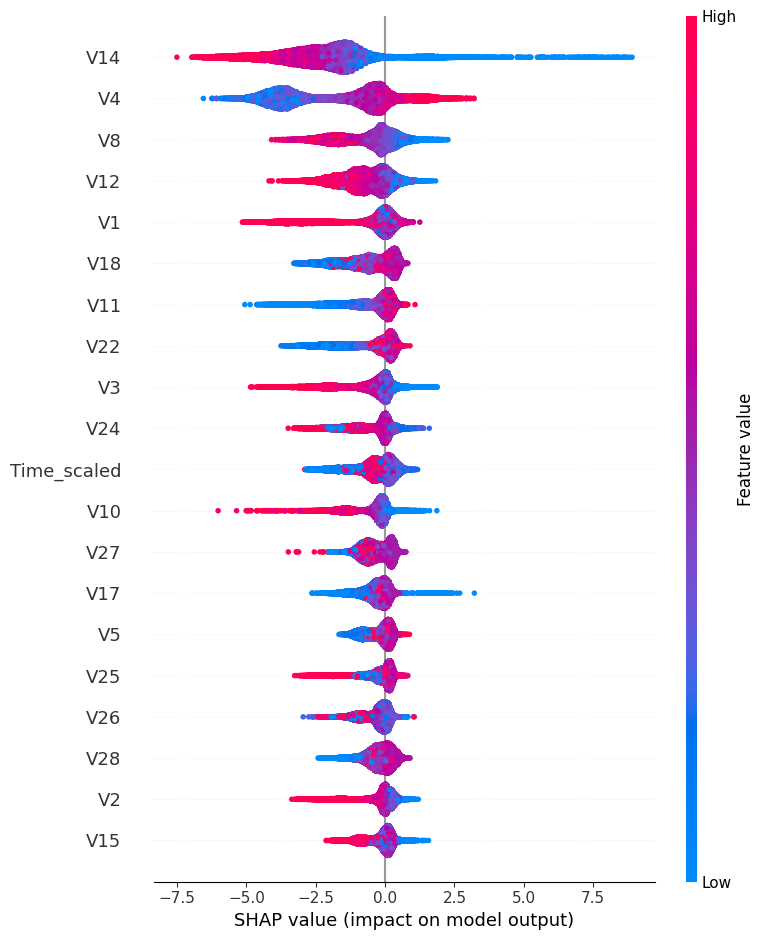

In [31]:
# SHAP Explainability (XGBoost)

explainer = shap.Explainer(xgb)
shap_values = explainer(X_test)

shap.summary_plot(shap_values, X_test)

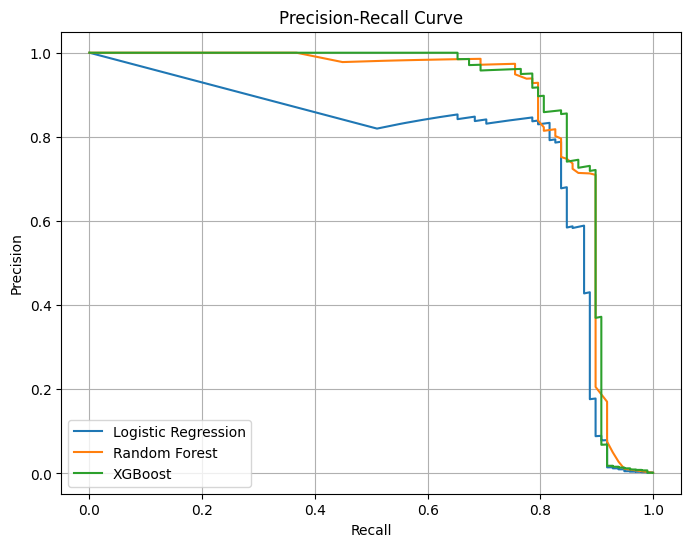

In [32]:
# Precision-Recall Curve

def plot_precision_recall(y_true, y_scores, label):
    precision, recall, _ = precision_recall_curve(y_true, y_scores)
    plt.plot(recall, precision, label=label)

plt.figure(figsize=(8,6))
plot_precision_recall(y_test, lr.predict_proba(X_test)[:,1], 'Logistic Regression')
plot_precision_recall(y_test, rf.predict_proba(X_test)[:,1], 'Random Forest')
plot_precision_recall(y_test, xgb.predict_proba(X_test)[:,1], 'XGBoost')
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.legend()
plt.grid()
plt.show()